In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000) 
X_train = pad_sequences(X_train, maxlen=200) 
X_test = pad_sequences(X_test, maxlen=200) 

In [3]:
model = Sequential([ 
Embedding(10000, 32),
Dense(128, activation='relu'),
Dropout(0.2),
GlobalAveragePooling1D(), 
Dense(1, activation='sigmoid') 
]) 

In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test)) 

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.6447 - loss: 0.6165 - val_accuracy: 0.8584 - val_loss: 0.3423
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8856 - loss: 0.2931 - val_accuracy: 0.8753 - val_loss: 0.2967
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9153 - loss: 0.2260 - val_accuracy: 0.8770 - val_loss: 0.2917
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9286 - loss: 0.1916 - val_accuracy: 0.8758 - val_loss: 0.2975
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.9409 - loss: 0.1659 - val_accuracy: 0.8736 - val_loss: 0.3114
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9492 - loss: 0.1493 - val_accuracy: 0.8694 - val_loss: 0.3313
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9573 - loss: 0.1287 - val_accuracy: 0.8654 - val_loss: 0.3559
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9646 - loss: 0.1108 - 

In [5]:
from tensorflow.math import confusion_matrix 

In [6]:
pred = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [7]:
matrix = confusion_matrix(pred, y_test)

In [8]:
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[12499, 12347],
       [    1,   153]], dtype=int32)>

In [12]:
!pip install seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     -------- ------------------------------ 61.4/294.9 kB 1.1 MB/s eta 0:00:01
     --------------- ---------------------- 122.9/294.9 kB 1.2 MB/s eta 0:00:01
     ------------------------- ------------ 194.6/294.9 kB 1.3 MB/s eta 0:00:01
     ----------------------------------- -- 276.5/294.9 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/11.6 MB 4.3 MB/s eta 0:00:03
      --------------------------------------- 0.2/11.6 MB 3.6 MB/s eta 0:00:04
     - -------------------------------------- 0.4/11.6 MB 3.0 MB/s eta 0:00:04
     - -------------------------------------- 0.5/11.6 MB 3.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/11.6 MB 3.5 MB/s eta 0:00:04
     --- ------------------------------------ 0.9/11.6 MB 3.


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

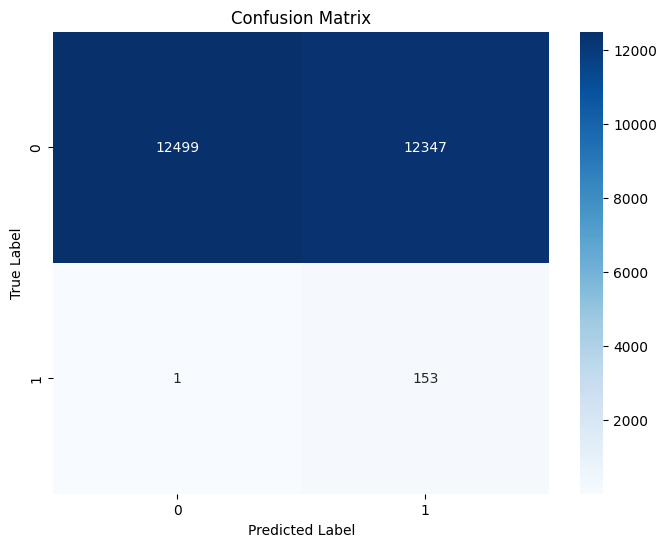

In [16]:
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sns.heatmap(matrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()